In [1]:
import rHN
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [3]:
N = 100

topologymask = 1 - torch.diag(torch.ones(N))

W = torch.from_numpy(np.random.choice((-1, 1), (N, N)))

for i in range(N):

    for j in range(N):

        if np.floor(i/5) == np.floor(j/5):

            W[i,j] = np.random.choice((-1, 1), p=(0.1, 0.9))
        
        else:

            W[i,j] = np.random.choice((-0.01, 0.01), p=(0.1, 0.9))

W = torch.triu(W)

W = W + W.T

W = W * topologymask

T = 10 * N

lr = 0.001 / 10 * N

topologymask = topologymask.to(device)

W = W.to(device)


In [4]:
model = rHN.rHN(W = W,
                W0 = W,
                topologymask=topologymask,
                T = T,
                lr = lr)

In [5]:
relaxations = 1000

perturbations = torch.from_numpy(np.random.choice((-1,1), (relaxations, N, 1))).type(torch.float)

energy = torch.zeros((relaxations, T))

perturbations = perturbations.to(device)

energy = energy.to(device)

for relaxation in tqdm(range(relaxations)):

    model.set_state(perturbations[relaxation])

    energy[relaxation] = model.relax(discrete=True)

energy = energy.T.numpy()

100%|██████████| 1000/1000 [00:39<00:00, 25.19it/s]


In [6]:
E = {'rHN-0':energy}

In [7]:
model.hebbian_on()

In [8]:
energy = torch.zeros((relaxations, T))

energy = energy.to(device)

for relaxation in tqdm(range(relaxations)):

    model.set_state(perturbations[relaxation])

    energy[relaxation] = model.relax(discrete=True)

energy = energy.T.numpy()

100%|██████████| 1000/1000 [00:38<00:00, 25.95it/s]


In [9]:
E['rHN-S'] = energy

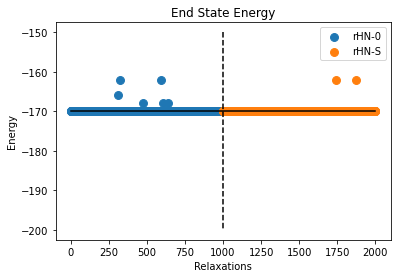

In [10]:
plt.scatter(np.arange(len(E['rHN-0'][0])), E['rHN-0'][-1], label='rHN-0', s=len(E['rHN-0'])/16)

plt.scatter(np.arange(len(E['rHN-0'][0]), len(E['rHN-0'][0])*2), E['rHN-S'][-1], label='rHN-S', s=len(E['rHN-0'])/16)

plt.plot([relaxations, relaxations], [-150, -200], '--', color='black')

plt.title('End State Energy')

plt.xlabel('Relaxations')

plt.ylabel('Energy')

plt.legend()

plt.plot((0,2000),(np.min(E['rHN-0'][-1]), np.min(E['rHN-0'][-1])), color='black')

plt.show()